In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

# [t, x, y]
data = np.array(
    [
        [0.0000, 1.0000, 0.0000],  # i=0
        [0.8976, 1.5984, 0.7818],  # i=1
        [1.7952, -0.6564, 0.9750],  # i=2
        [2.6928, -1.6828, 0.4339],  # i=3
        [3.5904, -0.1191, -0.4339],  # i=4
        [4.4880, 0.2114, -0.9750],  # i=5
        [5.3856, -0.3514, -0.7818],  # i=6
        [6.2832, 1.0000, 0.0000],  # i=7
    ]
)

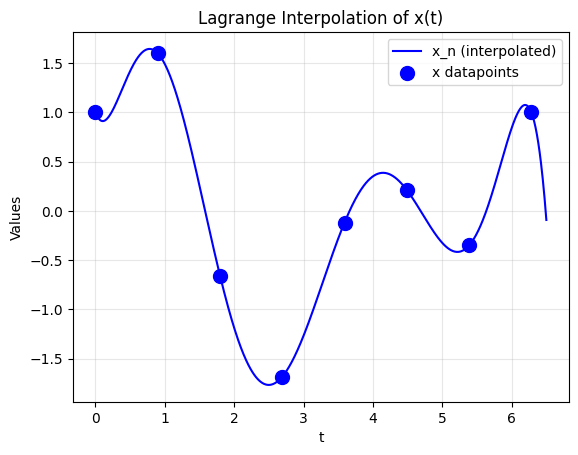

In [14]:
#2a)
# 8 datapoints, so we need 8 cardinal polynomials
def l_i(t_vals: NDArray, i: int, x: float) -> float:
    product = 1
    # print("in l_i, t_vals.size = ", t_vals.size)
    for j in range(len(t_vals)):
        if j == i:
            continue
        product *= (x - t_vals[j]) / (t_vals[i] - t_vals[j])
    return product


def x_n(data: NDArray, x):
    # print("in x_n, data.size = ", data.size)
    t_vals = data[:, 0]
    x_vals = data[:, 1]
    total = 0
    for i in range(len(data)):
        total += l_i(t_vals, i, x) * x_vals[i]
    return total



t_axis = np.linspace(0, 6.5, 1000)

x_interpolated = x_n(data, t_axis)

plt.plot(t_axis, x_interpolated, label="x_n (interpolated)", color="blue")

plt.scatter(
    data[:, 0],
    data[:, 1],
    color="blue",
    s=100,
    marker="o",
    label="x datapoints",
    zorder=5,
)

plt.xlabel("t")
plt.ylabel("Values")
plt.title("Lagrange Interpolation of x(t)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


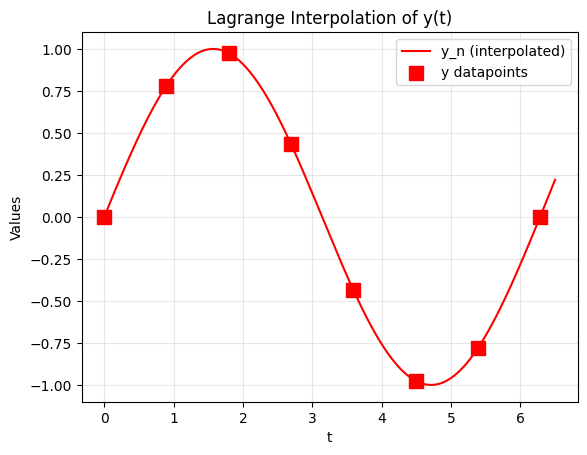

In [15]:
# 2b)

def y_n(data: NDArray, x):
    t_vals = data[:, 0]
    y_vals = data[:, 2]
    total = 0
    for i in range(len(data)):
        total += l_i(t_vals, i, x) * y_vals[i]
    return total

y_interpolated = y_n(data, t_axis)
plt.plot(t_axis, y_interpolated, label="y_n (interpolated)", color="red")

plt.scatter(
    data[:, 0],
    data[:, 2],
    color="red",
    s=100,
    marker="s",
    label="y datapoints",
    zorder=5,
)

plt.xlabel("t")
plt.ylabel("Values")
plt.title("Lagrange Interpolation of y(t)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

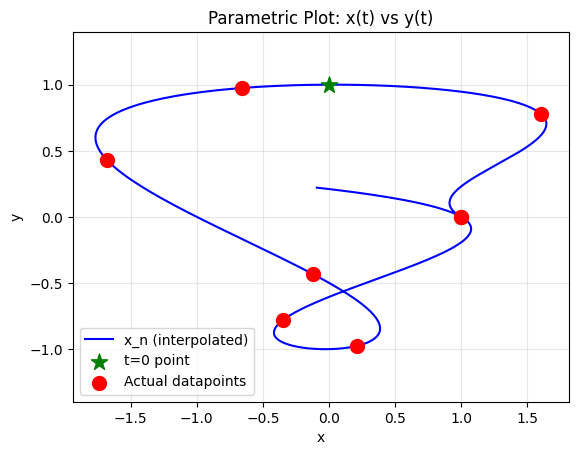

In [ ]:
#2c)

plt.plot(x_interpolated, y_interpolated, label="x_n (interpolated)", color="blue")

plt.scatter(
    0,  # t=0
    x_n(data, 0),
    color='green',
    s=150,
    marker='*',
    label='t=0 point',
    zorder=6
)


plt.scatter(
    data[:, 1],
    data[:, 2],
    color="red",
    s=100,
    marker="o",
    label="Actual datapoints",
    zorder=5,
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Parametric Plot: x(t) vs y(t)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

plt.show()

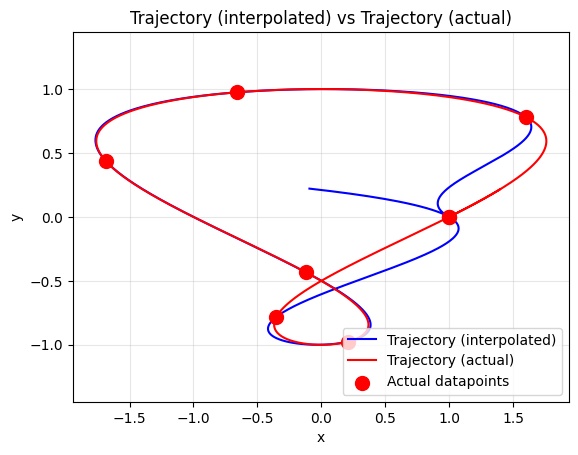

In [25]:
#2d)

def x_actual(t):
	return np.cos(t) + np.sin(2*t)

def y_actual(t):
	return np.sin(t)


plt.plot(x_interpolated, y_interpolated, label="Trajectory (interpolated)", color="blue")
plt.plot(x_actual(t_axis), y_actual(t_axis), label="Trajectory (actual)", color="red")


plt.scatter(
    data[:, 1],
    data[:, 2],
    color="red",
    s=100,
    marker="o",
    label="Actual datapoints",
    zorder=5,
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory (interpolated) vs Trajectory (actual)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

plt.show()

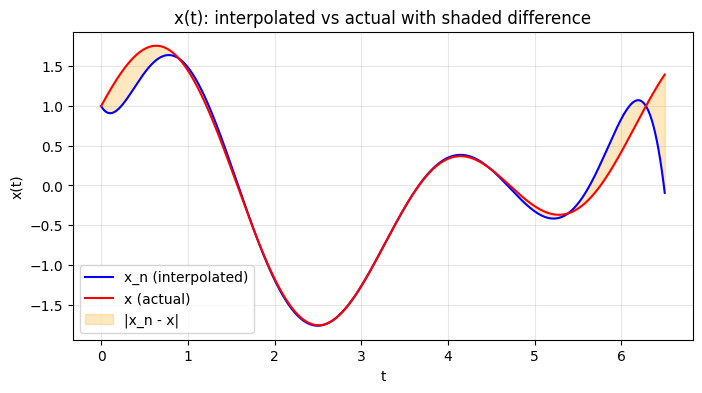

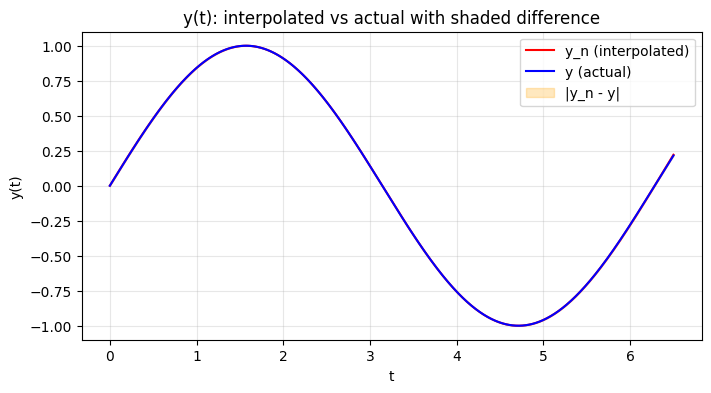

In [ ]:
# x(t): interpolated vs actual
plt.figure(figsize=(8, 4))
plt.plot(t_axis, x_interpolated, label="x_n (interpolated)", color="blue")
plt.plot(t_axis, x_actual(t_axis), label="x (actual)", color="red")
plt.fill_between(t_axis, x_interpolated, x_actual(t_axis), color="orange", alpha=0.25, label="|x_n - x|")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("x(t): interpolated vs actual with shaded difference")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# y(t): interpolated vs actual
plt.figure(figsize=(8, 4))
plt.plot(t_axis, y_interpolated, label="y_n (interpolated)", color="red")
plt.plot(t_axis, y_actual(t_axis), label="y (actual)", color="blue")
plt.fill_between(t_axis, y_interpolated, y_actual(t_axis), color="orange", alpha=0.25, label="|y_n - y|")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("y(t): interpolated vs actual with shaded difference")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
print(f"Mean error for y(t): {(y_actual(t_axis) - y_interpolated).mean():.6f}")
print(f"Standard deviation of error for y(t): {(y_actual(t_axis) - y_interpolated).std():.6f}\n")

print(f"Mean error for x(t): {(x_actual(t_axis) - x_interpolated).mean():.6f}")
print(f"Standard deviation of error for x(t): {(x_actual(t_axis) - x_interpolated).std():.6f}")

Mean error for y(t): -0.000087
Standard deviation of error for y(t): 0.000787

Mean error for x(t): 0.022065
Standard deviation of error for x(t): 0.204820


As we can see both interpolations worked well. There is a bigger difference at the end of the intervals. The simpler single-sine-wave (y_t) was easier to interpolate, which we can see from the mean error and std of error